# Collect and filter AlphaFold output

In [1]:
# %load_ext lab_black
# Python standard library
from glob import glob, iglob
import os
import socket
import sys

# 3rd party library imports
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar

tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers
running on node: sofia


#### First look at predictions of MSD designs starting from af2 models ####


In [2]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_3_af2/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))
scores_df

,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
bcaf65a21ef43d2f39b27ad7f5cb231fd94733d9635d8567_af2pred,2.964,27.190,27.128,27.251,3.240,95.567,94.357,94.962,21.004,261.014
bd49a950312d3dde2d20a1fbdf0114df35c11f59f900b2f4_af2pred,3.647,26.427,26.709,26.145,3.063,93.078,95.270,94.174,22.641,40.788
bdae8ea9fa6b82624359b6624fdcfe9f5c182270d659e255_af2pred,3.766,4.826,5.019,4.634,3.075,93.100,95.192,94.146,1.371,40.757
bfde73cf933ce3ae7ddf98dec3ffc8bb9038a5057fde79d3_af2pred,5.431,21.125,21.969,20.281,3.171,89.592,94.659,92.125,19.423,40.774
c0774b5040ec1735316b6eeb6e51f13d9acfd23c84a4645b_af2pred,2.999,26.937,26.840,27.034,3.408,95.544,93.719,94.632,10.680,40.944
...,...,...,...,...,...,...,...,...,...,...
5fdb932f4f0ca83268e1db59d8dab2b4c579b6f393401b80_af2pred,4.321,26.664,26.843,26.484,4.139,91.691,92.503,92.097,20.272,40.038
6088051392a97b2d6533ab4850d9a7ca74b8361d2ab3ff86_af2pred,7.531,22.565,22.840,22.290,10.041,86.611,87.755,87.183,19.522,40.150
612b1778c9d8838056f8bc77bf715f0d39bb12f31c592533_af2pred,6.510,12.794,12.764,12.825,7.646,84.741,85.595,85.168,1.380,40.313


5it [00:00, 12.83it/s]


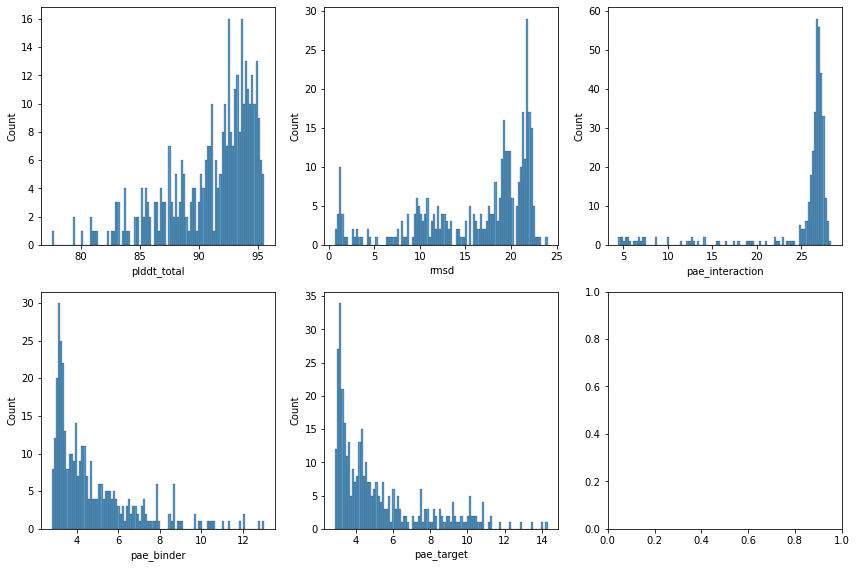

In [3]:
import sys
sys.path.insert(0, '/home/broerman/projects/crispy_shifty/')
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt_total",
        "rmsd",
        "pae_interaction",
        "pae_binder",
        "pae_target",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [4]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

In [5]:
# Filter designs

cutoffs = [
    ('plddt_total', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

25


,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
bdae8ea9fa6b82624359b6624fdcfe9f5c182270d659e255_af2pred,3.766,4.826,5.019,4.634,3.075,93.100,95.192,94.146,1.371,40.757
c50eb09e406c0efc501a9f721f9c473b6843077269818292_af2pred,3.415,4.954,4.964,4.943,3.543,93.820,94.357,94.088,0.711,40.754
c7a30c9e53cd395ad546c9853803c5e361b504a5dfd42897_af2pred,4.432,8.544,8.469,8.618,5.544,90.395,90.847,90.621,1.039,40.734
cdb92fe9e222c9006189a561fd0a3c45402cd91f941d79d7_af2pred,4.610,7.397,7.365,7.429,4.732,90.981,92.018,91.499,2.827,40.755
cf7e69462d8195eaf484ea1fd2e64e8e7402250c8ba615ce_af2pred,3.833,5.514,5.410,5.618,3.979,92.943,92.781,92.862,1.458,40.642
d91d8ba45854b20f47e5f971c854d2669877e1ec01c63329_af2pred,5.604,6.711,6.843,6.579,3.807,89.628,92.746,91.187,1.406,40.726
f3cb097faf26db7bcab2c50bdffd51d1d366f079cd2cc9a3_af2pred,7.832,11.569,11.775,11.362,4.951,83.052,87.580,85.316,1.236,40.495
fb468aec0dfcd96eb576ac8258bec91c5bfd586d291e7bcd_af2pred,7.010,10.012,10.331,9.692,3.735,85.462,90.912,88.187,1.583,40.512
773127d0eed8e63dde64fcebe594a039e9669afd1de9f7e3_af2pred,7.821,9.954,10.141,9.767,5.072,86.827,89.889,88.358,1.974,40.941


In [7]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")


echo "bdae8ea9fa6b82624359b6624fdcfe9f5c182270d659e255_af2pred c50eb09e406c0efc501a9f721f9c473b6843077269818292_af2pred c7a30c9e53cd395ad546c9853803c5e361b504a5dfd42897_af2pred cdb92fe9e222c9006189a561fd0a3c45402cd91f941d79d7_af2pred cf7e69462d8195eaf484ea1fd2e64e8e7402250c8ba615ce_af2pred d91d8ba45854b20f47e5f971c854d2669877e1ec01c63329_af2pred f3cb097faf26db7bcab2c50bdffd51d1d366f079cd2cc9a3_af2pred fb468aec0dfcd96eb576ac8258bec91c5bfd586d291e7bcd_af2pred 773127d0eed8e63dde64fcebe594a039e9669afd1de9f7e3_af2pred 7b1a8b8081500483275e513ff9f48447369d5617a7ff52f4_af2pred 8cb194ad6602573712ae6ef5fbd565d9bda28f75ab578287_af2pred a4ee21932a10335e168a099be1555119b3d87f41791b87e1_af2pred ac1f8a5f5d65eed05768033130be4978ffdfdab50f2fcf7e_af2pred ad5ba5cc782c8d5fdaf4140bb011b5f1adf2f045114d3b15_af2pred b847827f122398124dd09fdab71141989d3bcdfe6e79e569_af2pred 4b24843fc643e27add4f8c76b56eeb5f828683cf59f91212_af2pred 0b4ba829b658706e9ff255717e7418343150874ff36adc7c_af2pred 0ba373fe0fda531acb96cd0cc

In [6]:
with open('06_alphafold_two_state/05_run_3_af2/predicted_dimers.list', 'w') as f:
    for file in sorted(filtered_df.index):
        f.write('/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/05_two_state/run_3/af2_decoys/' + file[:-8] + '.pdb\n')

#### Now look at predictions of MSD designs starting from design models ####


In [7]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_3_des/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))
scores_df

,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
d81fdd8801498b3414eb012745ce8b7570cc4fa120b94a11_af2pred,4.150,27.228,27.365,27.091,3.309,91.550,94.337,92.943,22.306,260.395
d984db594d5d462b3c298497521a29ef9e88f029d0862529_af2pred,3.220,26.780,26.873,26.688,3.072,94.631,95.046,94.839,19.282,39.418
d9f0da13f4d50b81012c1c95a371625defbd72fe5ad0312e_af2pred,3.334,5.735,5.538,5.932,4.639,93.002,91.767,92.384,1.308,39.494
da52cf3a5581607187d771eab8d05c47052a69da41ef2907_af2pred,3.248,26.285,26.369,26.201,3.575,94.593,93.386,93.989,20.128,39.449
db04a283d031b0d0b5157b27da472d25352b0106b4741ab0_af2pred,2.878,26.508,26.486,26.531,3.183,95.933,94.795,95.364,15.369,39.363
...,...,...,...,...,...,...,...,...,...,...
f18953f3ed8642600520031c289eca7c962fdb668610a43a_af2pred,6.258,27.149,27.297,27.002,5.475,86.488,89.225,87.857,9.211,76.863
f5db74480061ee5aef086a7f2efc5f1ac7a34eba57e4fd49_af2pred,7.401,27.359,27.758,26.960,4.408,82.984,91.487,87.235,21.677,76.822
f72052d7742ca842970b8747762147ea6339f966c2cef050_af2pred,12.353,16.311,17.005,15.616,5.583,72.585,82.481,77.533,4.979,77.089


5it [00:00,  9.11it/s]


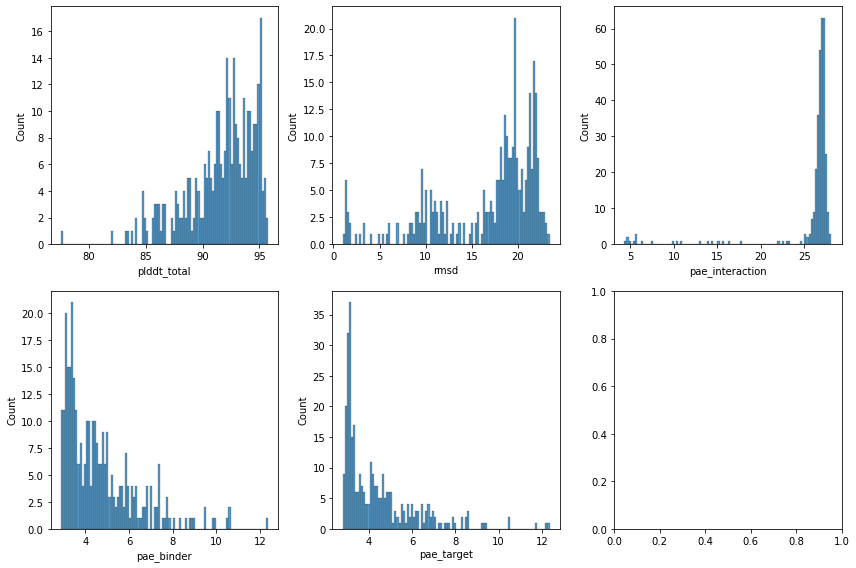

In [8]:
import sys
sys.path.insert(0, '/home/broerman/projects/crispy_shifty/')
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt_total",
        "rmsd",
        "pae_interaction",
        "pae_binder",
        "pae_target",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [9]:
# Filter designs

cutoffs = [
    ('plddt_total', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

14


,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
d9f0da13f4d50b81012c1c95a371625defbd72fe5ad0312e_af2pred,3.334,5.735,5.538,5.932,4.639,93.002,91.767,92.384,1.308,39.494
dcf682293eecaf62ccf6aab599902a085743d38ca7c2dffb_af2pred,6.622,13.118,13.254,12.982,6.026,85.006,86.213,85.609,1.489,39.432
840e8c527e7480b898a30c510ca1c7b442925f82ffe2b84f_af2pred,6.283,10.442,10.353,10.531,6.975,88.795,89.060,88.927,2.495,40.683
8d4d46880a5839c8d2fa85d28371d053ee2d2baca9213f6e_af2pred,4.271,5.436,5.483,5.388,3.286,91.961,93.915,92.938,1.333,40.493
918030406dd6fded679bbc4ced5d9571f3e1c7a0e707df11_af2pred,7.760,10.837,11.101,10.572,4.887,83.367,88.503,85.935,1.737,40.394
abf0c95f458e0e4b89e03f8f687931b07790af4b9b1534ae_af2pred,3.340,5.688,5.581,5.795,4.421,93.665,92.840,93.252,1.356,40.315
b729bc5a6566daebc076d0773febed133ad2ac2bc81e7b48_af2pred,3.499,4.787,4.911,4.664,3.348,93.408,94.543,93.975,1.316,40.388
ca78c30abb2048b3ec1597b0b01a8a3a6034d637a33548e9_af2pred,3.387,4.573,4.643,4.503,3.119,93.856,94.856,94.356,1.607,40.369
03d9c3092f8f7cb57d56bd0605974a6126f1e9d0763e954c_af2pred,3.280,5.002,4.875,5.129,3.757,93.929,93.541,93.735,1.496,39.880


In [12]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")


echo "d9f0da13f4d50b81012c1c95a371625defbd72fe5ad0312e_af2pred dcf682293eecaf62ccf6aab599902a085743d38ca7c2dffb_af2pred 840e8c527e7480b898a30c510ca1c7b442925f82ffe2b84f_af2pred 8d4d46880a5839c8d2fa85d28371d053ee2d2baca9213f6e_af2pred 918030406dd6fded679bbc4ced5d9571f3e1c7a0e707df11_af2pred abf0c95f458e0e4b89e03f8f687931b07790af4b9b1534ae_af2pred b729bc5a6566daebc076d0773febed133ad2ac2bc81e7b48_af2pred ca78c30abb2048b3ec1597b0b01a8a3a6034d637a33548e9_af2pred 03d9c3092f8f7cb57d56bd0605974a6126f1e9d0763e954c_af2pred 0c32ccb33e7997df94905549b75ab73b4bfbfc205f46c8a6_af2pred 540210c96a1ce895d2add7e3a5079f5aa4499a7759244ed3_af2pred 622c2f454f4f35984a0042101bdb09ffd57be0b0300bd650_af2pred 79f60e7df22dccb99eb514253045382e8af7bb94e871d4ea_af2pred e8255eccddacaa1254fc49ac56a15731803ad4df924a9817_af2pred" | silentextractspecific ../af2_predictions.silent


In [ ]:
with open('06_alphafold_two_state/05_run_3_des/predicted_dimers.list', 'w') as f:
    for file in sorted(filtered_df.index):
        f.write('/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/05_two_state/run_3/design_decoys/' + file[:-8] + '.pdb\n')

In [ ]:
# TODO add scores back in and plot Rosetta metrics